#Importing Libaries

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

#Using Configuration files and frozen model with datasets

In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [4]:
frozen_model ='frozen_inference_graph.pb'

#Creating a detection model 

In [5]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

#Appending Class labels from dataset to a list

In [6]:
classlabels=[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

#Customizing Model

In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)


<dnn_Model 00000124B76E3F10>

# read an image

In [8]:
image = cv2.imread('man.jpg')

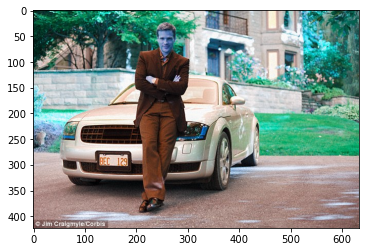

In [9]:
plt.imshow(image)

#Changing BGR TO RGB

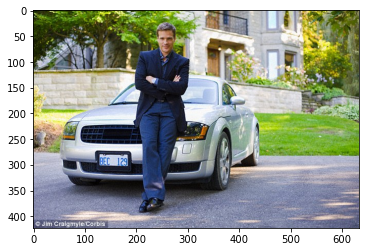

In [10]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

#Detecting Objects

In [11]:
ClassIndex,confidence,bbox = model.detect(image,confThreshold=0.5)

#Printing the output

In [12]:
print(ClassIndex)

[3 1]


#Putting Text on the picture

In [13]:
font_scale=1.5
font = cv2.FONT_HERSHEY_PLAIN
for classInd , conf , boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(image,boxes,(255,0,0),2)
    cv2.putText(image,classlabels[classInd - 1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

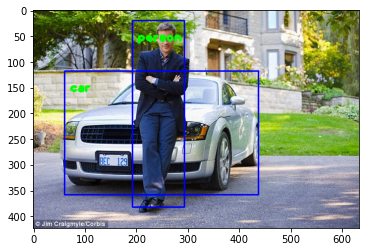

In [14]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))